# Class 8

## Networks

In [2]:
import networkx as nx
#from igraph import Graph
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Brief introduction

<b>Networks/graphs</b> are (1) a set of objects (called nodes or vertices), (2) relationships between those objects (called links or edges)</br> $G(N,E)$: The graph $G$ is composed of the set of nodes $N$ and the set of edges $E$ connecting the nodes

<img src="http://connectedthebook.com/images/links/social_networks2.gif" alt="a Network" style="width:304px;height:228px;">


Types of graphs:
* **Undirected** or **directed** networks. The friendship network in Facebook is an example of an undirected graph, twitter is a directed graph.
* **Unweighted** or **weighted**: the friendship network in Facebook is unweighted, the airport network (nodes: airports, links: number of airplanes flying between two airports) is weighted. 
* **Multilayer**: $G(N_1,N_2,E_1,E_2,E_{12})$ multi dimensional networks, e.g. network of the internet hubs and the power suppliers
* **Multiplex networks**: $G(N,E1,E2)$, Multilayer networks, where nodes are the same in all layer, e.g. social network (layer communication channel), cities, and transportation possibilities)

Jargon:
* Node $j$ is a **neighbor** of node $i$ if the edge $(i,j)$ exists. The **neighborhood** of $i$ is the set of all $i$'s neighbors.
* The **degree** of $i$ is the number of its neighbors. The **degree distribution** $P(k)$ is the probability that a randomly chosen node in the network has degree $k$.
* **Hubs** are nodes with very high degree. In many networks (the Internet, social networks, etc.) they are rare but much more common than you may expect.
* **Sparse**: Most pairs of nodes do not have a link. Real-world networks are of this kind.
* A **path** between two nodes, say $i$ and $j$, is the series of nodes that you need to traverse in order to get from $i$ to $j$ (and from $j$ to $i$ in case of undirected graphs).
* The **distance** between nodes $i$ and $j$ is the length of the *shortest path* between them. The **diameter** of a network is the *longest* shortest path.
* **Clustering coefficient** $c_i$ of node $i$ is the fraction of neighbors of $i$ that are linked: 

$$c_i = \frac{T_i}{\binom{k_i}{2}} = \frac{2T_i}{k_i(k_i-1)}$$

where $T_i$ is the number of triangles through node $i$. In simple words it quantifies how many of $i$'s friends also know each other.

Specific graphs:
* **Complete graphs**: every link exists $\binom{n}{2}$ links for $n$ nodes.
* **Lattices**
* **Erdős-Rényi** graphs
* Many more



### Creating a Graph
Graph is just a collection of nodes(vertices) with edges(links, etc.)
</br>
In NetworkX, nodes can be any hashable obejct: string, image, XML object, another Graph, customized node object. Flexibility boosts efficiency!

In [3]:
G = nx.Graph()            # create an empty graph with no nodes and no edges
print(G.nodes(), G.edges())

[] []


### Nodes
Adding node and nodes using add_node and add_nodes_from.

In [4]:
G.add_node(11)    # add a single node
print(G.nodes())

[11]


In [5]:
G.add_nodes_from([12,13])    # add a list of nodes
print(G.nodes())
print('number of nodes in the graph:', G.number_of_nodes())

[11, 12, 13]
number of nodes in the graph: 3


### Edges

In [6]:
G.clear()
G.add_nodes_from([51,52,55,"a","funny node"])
G.add_edge(51,52)
print(G.nodes(), G.edges())
print(nx.info(G))

[51, 52, 55, 'a', 'funny node'] [(51, 52)]
Name: 
Type: Graph
Number of nodes: 5
Number of edges: 1
Average degree:   0.4000


In [7]:
G.clear()
G.add_edges_from([(1,2), (1,3)]) # add edges from a edge list
print(G.edges())
G.add_edges_from([(2,1)]) # adding an edge that is already present
print(G.edges()) # No difference!
print(G.nodes())

[(1, 2), (1, 3)]
[(1, 2), (1, 3)]
[1, 2, 3]


### Directed graphs

In [8]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3)])
print(G.edges())
G.add_edges_from([(2,1)]) # add reverse edge
print(G.edges()) # it is there
print("Neigbors",list(G.neighbors(1)))
print("Successors",list(G.successors(1)))
print("Predecessors",list(G.predecessors(1)))

[(1, 2), (1, 3)]
[(1, 2), (1, 3), (2, 1)]
Neigbors [2, 3]
Successors [2, 3]
Predecessors [2]


In [9]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3)])
G.add_node(0)
print(G.edges())
print(G.nodes())
print(list(G.neighbors(1)))

[(1, 2), (1, 3)]
[1, 2, 3, 0]
[2, 3]


### Drawing Graphs
You can draw basic graphs using Matplotlib (which is included in Anaconda already) or use Graphviz instead.

See https://networkx.github.io/documentation/latest/reference/drawing.html for more details.

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


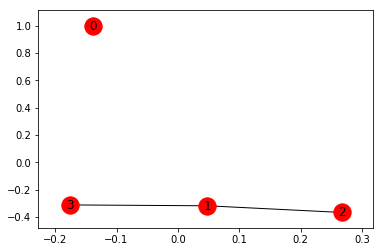

In [11]:
nx.draw_networkx(G, with_labels=True)
plt.show()

[(1, 2), (1, 3)]


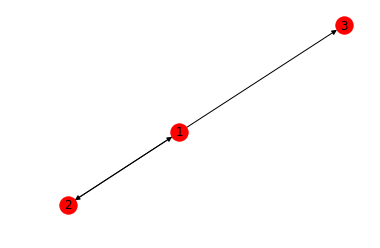

In [12]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3)])
print(G.edges())
G.add_edge(2,1)
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

### Adjacency matrix
$A_{ij}=1$ if nodes $i$ and $j$ are connected, $A_{ij}=0$ otherwise.

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


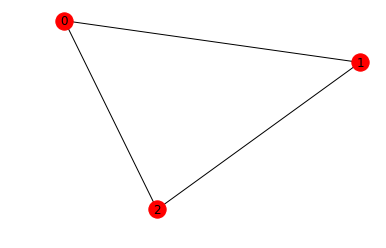

In [17]:
adj = np.array([[0, 1, 0],
              [1, 0, 1],
              [1, 1, 0]])
G = nx.from_numpy_matrix(adj)
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

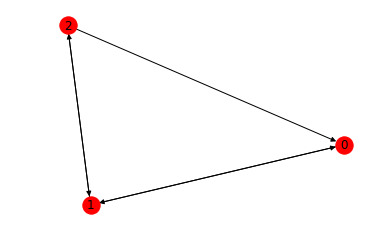

In [14]:
adj = np.array([[0, 1, 0],
              [1, 0, 1],
              [1, 1, 0]])
G = nx.from_numpy_matrix(adj,create_using=nx.DiGraph)
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

### Exercise 1
Create and plot the following graph
<img src="net_ex.png">

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


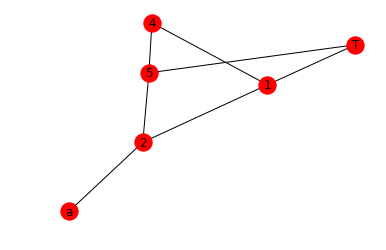

In [22]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,"T"), (2, "a"),(2,5), ("T", 5), (4,5),(1,4)])
#print(G.edges())
#print(G.nodes())
#print(list(G.neighbors(1)))
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

### Exercise 2
For the previous graph:
* Count the number of edges
* Count the number of nodes
* Calculate the average degree per node
* Calculate the maximum and minimum number of neighbors
* Calculate the number of nodes with degree = 2

In [44]:
print(nx.info(G))
neighbors_len = [len(list(G.neighbors(i))) for i in G.nodes]
print("Max numbers of neighbors: " + str(max(neighbors_len)))
print("Min numbers of neighbors: " + str(min(neighbors_len)))
len([i for i in neighbors_len if i == 2])

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333
Max numbers of neighbors: 3
Min numbers of neighbors: 1


2

### Wighted networks and properties

In [45]:
G = nx.Graph()
G.add_edge(1,2,weight=10,transport="bus")
G.add_edge(2,3,weight=5,transport="train")
print(G[1][2])

{'weight': 10, 'transport': 'bus'}


In [16]:
G = nx.Graph()
G.add_edge(1,2,weight=10,transport="bus")
G.add_edge(2,3,weight=5,transport="train")
for e in G.edges():
    print(e)

(1, 2)
(2, 3)


In [46]:
G = nx.Graph()
G.add_edge(1,2,weight=10,transport="bus")
G.add_edge(2,3,weight=5,transport="train")
for e in G.edges(data=True):
    print(e)

(1, 2, {'weight': 10, 'transport': 'bus'})
(2, 3, {'weight': 5, 'transport': 'train'})


In [47]:
G = nx.Graph()
G.add_edge(1,2,weight=10,transport="bus")
G.add_edge(2,3,weight=5,transport="train")
for [e1, e2, w] in G.edges(data=True):
    print("%d -- %d [weight=%g];" % (e1,e2,w['weight']))

1 -- 2 [weight=10];
2 -- 3 [weight=5];


C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


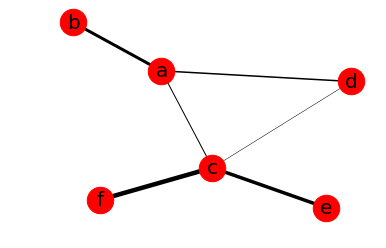

In [50]:
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

edges = [(u, v) for (u, v) in G.edges()]
weight = [d['weight']*5.0 for (u, v, d) in G.edges(data=True)]

pos = nx.spring_layout(G) #dynamical model for node positions
nx.draw_networkx_nodes(G, pos, node_size=700) #draw nodes
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weight) #draw edges
nx.draw_networkx_labels(G, pos, font_size=20) #draw labels

plt.axis('off')
plt.show()


In [49]:
nx.shortest_path(G,"b","e",weight='weight')

['b', 'a', 'c', 'e']

### Exercise 3
Modify the weights that the shortest path will be through 'd'

In [58]:
G.edges['a','c']['weight'] = 1 
nx.shortest_path(G,"b","e",weight='weight')

['b', 'a', 'd', 'c', 'e']

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


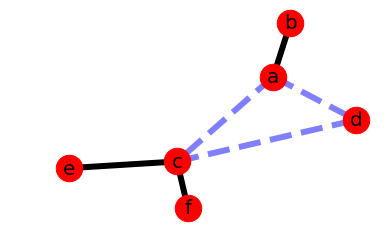

In [59]:
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()


### Exercise 4

Create a graph with 20 nodes, and randomly ad 20 edges. Plot the resulting graph

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


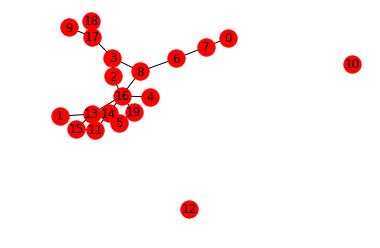

In [93]:
import numpy as np
n = 20
G = nx.Graph()
G.add_nodes_from(range(n))
all_edges = [[i,j] for i in range(n) for j in range(n) if i < j]
edges = np.random.choice(int(n * (n - 1) / 2), n, replace = False)
for i in edges:
    G.add_edge(all_edges[i][0], all_edges[i][1])
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

### Random graphs (from models)
Banchmarking, testbeds

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


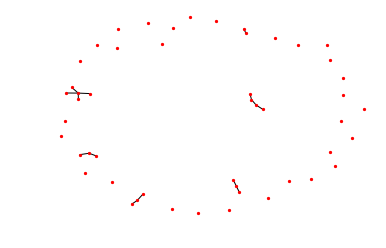

In [3]:
ER_graph=nx.erdos_renyi_graph(50, 0.02)
nx.draw_networkx(ER_graph, with_labels=False,node_size=5)
plt.axis('off')
plt.show()

### Exercise 5
Plot the degree distribution (histogram) of the Erdős-Rényi graph with parameters:
<pre>
G = nx.erdos_renyi_graph(1000, 0.01)
</pre>
Hint: G.degree() gives back an object with the nede names (here numbers) and the degrees. Convert it to a list or to an array to be able to work with it.

array([10,  8,  9,  9, 12, 10, 14,  8, 13,  6,  8,  7,  7,  4, 14,  8, 13,
        8,  9,  7,  8, 15,  5,  5,  8,  9,  9,  7,  9, 10,  6, 12,  8, 11,
        7,  7,  9, 15, 17,  8,  7,  7,  3,  9,  8,  8,  8,  8, 21, 15,  7,
       13,  4, 16, 11, 12, 11,  9, 15,  9, 15,  8, 15, 13,  8, 12,  4, 15,
       10, 12, 15, 10, 15, 12,  7,  9, 14, 14, 10,  9, 15,  4,  7,  9,  8,
        6, 12,  8, 15, 10, 10, 13,  9, 12, 12,  6,  8,  8,  6, 13,  9,  7,
       10, 10,  9, 11,  7,  8,  8,  6, 11,  9, 13,  7,  6,  9,  6, 10, 10,
       10, 10,  9, 14, 12, 10,  7,  4, 15, 11,  7, 12,  8, 12, 14,  9,  8,
        6,  9,  9, 12, 10, 11,  8, 14, 12, 11, 10, 11,  7, 12,  7, 16, 12,
       14, 10, 14,  6, 11, 10, 11, 14, 16,  9, 13, 10,  9, 12, 11, 16, 10,
        8, 11,  8, 10,  9, 11, 13, 11, 12,  9, 12,  7,  8, 10, 11,  7,  9,
        4, 12,  8,  6, 13, 10, 11, 16,  8, 11, 12, 13, 11, 17, 11, 10,  7,
        8,  9, 10,  7, 12, 11,  5, 11, 16,  8,  9, 14, 11, 10,  7,  9, 15,
        8,  8, 11, 11,  5

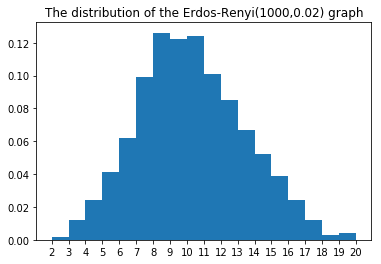

In [5]:
G = nx.erdos_renyi_graph(1000, 0.01)
a = np.array(G.degree())[:, 1]
plt.xticks(np.arange(int(a.min()),int(a.max())))
plt.hist(a, np.arange(int(a.min()),int(a.max())), density = 1 )
plt.title("The distribution of the Erdos-Renyi(1000,0.02) graph")
a


In [107]:
for c in nx.connected_components(ER_graph):
    print(c)

{0, 14}
{1}
{2, 39, 46, 15, 30}
{3, 41, 45, 49, 18, 23, 24, 25}
{4}
{5}
{6, 7, 11, 43, 13, 19}
{33, 34, 35, 36, 38, 8, 9, 40, 12, 47, 16, 26, 29}
{10}
{17}
{20}
{21}
{22}
{27}
{42, 28}
{31}
{32}
{37}
{44}
{48}


### Exercise 6
Print out the size of the largest component

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


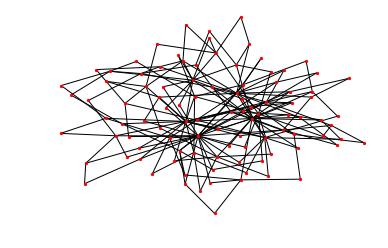

In [108]:
BA_graph = nx.barabasi_albert_graph(100,2)
nx.draw_networkx(BA_graph, with_labels=False,node_size=5)
plt.axis('off')
plt.show()

Text(0, 0.5, '$P(k)$')

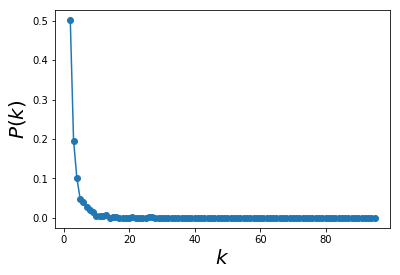

In [109]:
BA_graph = nx.barabasi_albert_graph(1000,2)
d = np.array((BA_graph.degree()))[:,1]
BA_hist, bin_edges= np.histogram(d, bins=max(d)-min(d), density=True)
plt.plot(bin_edges[:-1],BA_hist,'o-')
plt.xlabel(r'$k$', fontsize=20)
plt.ylabel(r'$P(k)$', fontsize=20)

Text(0, 0.5, '$P(k)$')

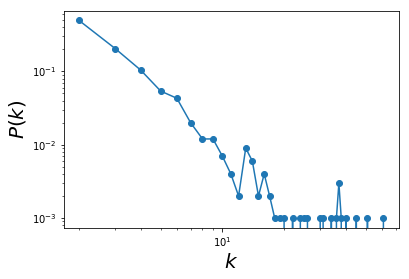

In [110]:
BA_graph = nx.barabasi_albert_graph(1000,2)
d = np.array((BA_graph.degree()))[:,1]
BA_hist, bin_edges= np.histogram(d, bins=max(d)-min(d), density=True)
plt.loglog(bin_edges[:-1],BA_hist,'o-')
plt.xlabel(r'$k$', fontsize=20)
plt.ylabel(r'$P(k)$', fontsize=20)

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


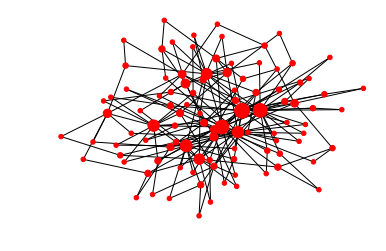

In [111]:
BA_graph = nx.barabasi_albert_graph(100,2)
nx.draw_networkx(BA_graph, with_labels=False,node_size=\
                 [BA_graph.degree[n]*10 for n in BA_graph.nodes])
plt.axis('off')
plt.show()

### Examples
<table>
    <tr><td><img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/National_Highway_System.jpg" width=300></td><td><img src="https://news.delta.com/sites/default/files/styles/square/public/US_10_15-01.png" width=300></td></tr>
</table>

## Other operations
There are a lot of operations included in networkx. If you work with networks, or you plan to, make sure you explore the documentation. Below there is a selection of useful operations. Take note of G.copy() (this is the way to create the deep copy of a graph!) 

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgraph of G induced by nodes in nbunch    

* ***`reverse(G)`***       
DiGraph with edges reversed 

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph of MultiDiGraph)

* ***`adjacency_matrix(G)`***      
adjacency matrix A of G (in sparse matrix format; to get full matrix, use A.toarray() )

### Exercise 7
* Read the edge_list <pre>G=nx.read_edgelist("ego250.list",nodetype=int)</pre>
* plot the network
* remove the node 250
* detect the connected components
* Keep only the largest components (delete the rest)
* plot the degree distribution

In [112]:
G=nx.read_edgelist("ego250.list",nodetype=int)
G.remove_node(250)

### Exercise 8
* Create Erdős-Rényi graphs with p=0.0002 - 0.003 with steps 0.0002
* plot the size of the largest component versus p
* calculate the variance of the size of the connected components <b>without the largest one</b>  and plot them against p